

# Project: Investigate a Dataset (Life_Expectancy_years)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, I investigate a life expectancy dataset from GapMinder which provides the life expectancies of countries in the world from the 20th century and predictions upto the end of the 21st century.

>In my investigation, I selected three countries, one is a developed country(United States) while the others are developing(Kenya and United Arab Emirates). I have also done a comparison between the data of these countries.
> This data brought up some questions which I used to analyze this data.

>__Research question 1__: Does life expectancy increase, decrease or remains constant as years go by?

>__Research question 2__: Is life expectancy in developed countries different from yhe life expectancy of developing countries?

In [135]:
#load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling



# Loading our and viewing our data which is in CSV(Comma Separated Values) format.

In [136]:
df=pd.read_csv('life_expectancy_years.csv',index_col='country')
df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


# Exploring our data

In [137]:
# summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: float64(301)
memory usage: 460.1+ KB


In [138]:
# checking for null values
df.isnull().sum()

1800    9
1801    9
1802    9
1803    9
1804    9
       ..
2096    9
2097    9
2098    9
2099    9
2100    9
Length: 301, dtype: int64

In [139]:
#replacing the null values with 0
df.replace(np.nan,'0',inplace = True)

In [140]:
# checking our data for duplicates
sum(df.duplicated())

0

In [141]:
#filter Kenya row and  year columns for 10 years from 2012 
df_Kenya=pd.DataFrame(df.loc['Kenya',['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']])
df_Kenya

,Kenya
2012,62.6
2013,63.2
2014,63.8
2015,64.4
2016,65.1
2017,65.7
2018,66.1
2019,66.5
2020,66.4
2021,67.0


In [142]:
#value counts returns the number of times a value has appeared in a dataframe.
df_USA=pd.DataFrame(df.loc['United States',['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']])
df_USA
df_USA.value_counts()

United States
79.0             5
78.9             2
79.1             2
77.0             1
dtype: int64

<AxesSubplot:ylabel='United Arab Emirates'>

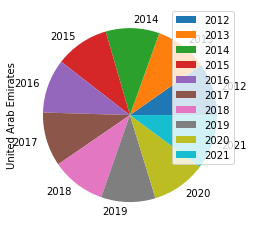

In [143]:
# pie chart for the UAE life expectancy.
df_UAE=pd.DataFrame(df.loc['United Arab Emirates',['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']])
df_UAE
df_UAE.plot(kind='pie',y='United Arab Emirates')



### Data Cleaning 

# Removing NaN values from our two dataframes to avoid errors


In [144]:
df_Combined=df_Kenya.dropna().append([df_USA,df_UAE])
df_Combined


C:\Users\Wycliffe\AppData\Local\Temp\ipykernel_13072\3606584117.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Combined=df_Kenya.dropna().append([df_USA,df_UAE])


,Kenya,United States,United Arab Emirates
2012,62.6,NaN,NaN
2013,63.2,NaN,NaN
2014,63.8,NaN,NaN
2015,64.4,NaN,NaN
2016,65.1,NaN,NaN
2017,65.7,NaN,NaN
2018,66.1,NaN,NaN
2019,66.5,NaN,NaN
2020,66.4,NaN,NaN
2021,67.0,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis


### __Research Question 1__ (Does life expectancy increase, decrease remains constant as years go by?)

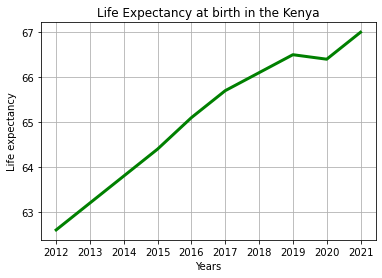

In [145]:
#a lineplot of Kenya data
plt.plot(df_Kenya,color='green',linewidth=3)
plt.title('Life Expectancy at birth in the Kenya')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.grid(True)
plt.savefig('png')

This line plot shows how the life expectancy of Kenya has been steadily increasing for the past 10 years with a small drop in 2020 due to the COVID-19 pandemic.

<AxesSubplot:title={'center':'Barplot of Life expectancy-USA'}, xlabel='years', ylabel='life expectancy'>

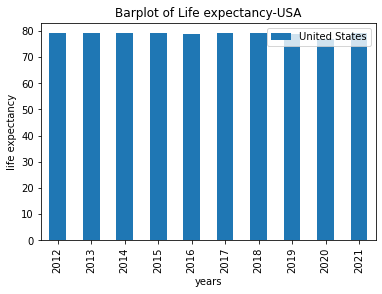

In [146]:
#Barplot of USA life expectancy
df_USA.plot(kind='bar',xlabel='years',ylabel='life expectancy',title='Barplot of Life expectancy-USA')

From this barplot, we observe that all the bars are almost of the same height meaning that the USA life expectancy probably constant.

# __Research Question 2__  (Is life expectancy of developed countries different from the life expectancy of developing countries?)

This question seeks to address another question of whether good infrastructure, better healthcare and medical insurance, which are in developed countries, can lead to a prolonged life and if so, what is the difference.

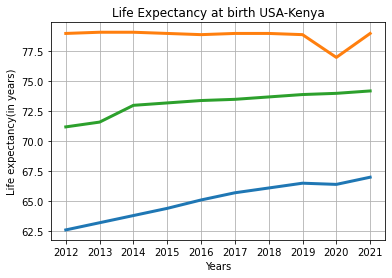

In [147]:
# A line plot of Kenya and United States showing a comparison between the two datasets.
plt.plot(df_Combined,linewidth=3)
plt.title('Life Expectancy at birth USA-Kenya')
plt.xlabel('Years')
plt.ylabel('Life expectancy(in years)')
plt.grid(True)

The line plot above shows differences in life expectancy among the three countries as well as whether they are increasing, decreasing or they are constant.
USA is seen to have an almost constant life expectancy with a slight depression in the year 2020 which was as a result of the COVID-19 pandemic.
Kenya and UAE seem to have consistent increase as years go by.

Text(0.5, 1.0, 'BarPlot of USA, Kenya and UAE')

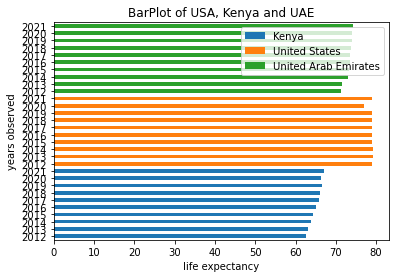

In [148]:
df_Combined.plot.barh(stacked=True)
plt.xlabel('life expectancy')
plt.ylabel('years observed')
plt.title('BarPlot of USA, Kenya and UAE')

This barplot compares the life expectancies of the three countries and the United States is seen to have a higher life expectancy compared to Kenya and United Arab Emirates. 

<a id='conclusions'></a>
## Conclusion

From our analysis, we can conclude that life expectancy has been increasing as years go by,although gradually. This could be attributed to several factors such as:

Better health care and hygiene,
Sufficient food,
Improved medical care especially in developing countries,
Reduced child mortality mean. [_National Library of Medicine- EMBO Reports(2015)_]

It is however noted from our visualized data that there was a decrease in life expectancy in the three datasets in 2020. This was at the height of the COVID-19 pandemic which took a toll on the life patterns of many countries as well as claiming many lives. This has been clearly visualized in the line plot showing life expectancy in the United States, UAE and Kenya a bit.



<a id='conclusions'></a>
## Limitation

One limitation about this data is that only three countries were used to represent all other countries in their categories thus it may not accurately depict the situation in all other countries.